# 课时20 tf.keras函数式API

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
sb.set_style('darkgrid')
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
print('Tensorflow Version:', tf.__version__)

Tensorflow Version: 2.4.0


# 1. 加载和处理fashion_mnist数据集

In [2]:
# 加载fashion_mnist数据集
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
# 将数据集划分训练集和测试集
(train_image, train_label), (test_image, test_label) = fashion_mnist
# 对于训练数据和测试数据的图片进行归一化：
train_image = train_image / 255
test_image = test_image / 255

# 2. 函数式API

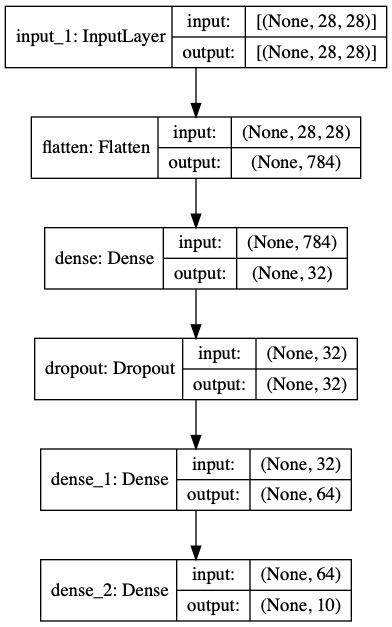

In [3]:
# 函数式API的灵活性更好，对于需要自己DIY的某个特殊组件，可以使用函数式API的方式实现
# 或者对于多输入多输出模型更好实现
input = tf.keras.Input(shape=(28, 28))
# 多输入时的情况
# x1 = tf.keras.layers.Flatten()(input1)
# x2 = tf.keras.layers.Flatten()(input2)
# tf.keras.layers.concatenate([x1, x2])

# 这里可以将Flatten()看做是一个函数，则input就是这个函数的输入
x = tf.keras.layers.Flatten()(input)
# 每一层都可以随意的调用某个函数，然后输入制定的数据即可
x = tf.keras.layers.Dense(units=32, activation='relu')(x)
x = tf.keras.layers.Dropout(rate=0.5)(x)
x = tf.keras.layers.Dense(units=64, activation='relu')(x)
output = tf.keras.layers.Dense(units=10,  activation='softmax')(x)
# 将上面的组件搭建起来组合成一个模型
model = tf.keras.Model(inputs=input, outputs=output)
tf.keras.utils.plot_model(model, './model_structure_image/func-API.jpg',                                        show_shapes=True)

In [5]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [4]:
# sparse_categorical_crossentropy对应的数据标签不是one-hot类型，它会在内部将其转换为one-hot
# categorical_crossentropy则相应的对应的数据标签是ont-hot类型
# loss_func = tf.keras.losses.BinaryCrossentropy()
# loss_func(y_true=xxx, y_pred=yyy)
# loss = tf.keras.losses.binaryCrossentropy(y_true=xxx, y_pred=yyy)
model.compile(tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy', 
              metrics=['acc'])
# 训练时添加交叉验证集validation_data
history = model.fit(train_image, train_label, epochs=5, 
                    validation_data=(test_image, test_label))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1089 - acc: 0.5753 - val_loss: 0.5680 - val_acc: 0.7778
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6681 - acc: 0.7475 - val_loss: 0.5605 - val_acc: 0.7739
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6314 - acc: 0.7641 - val_loss: 0.5081 - val_acc: 0.8136
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6042 - acc: 0.7768 - val_loss: 0.5448 - val_acc: 0.7906
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5896 - acc: 0.7821 - val_loss: 0.5910 - val_acc: 0.7742
